In [1]:
import sklearn
print(sklearn.__version__)

0.21.2


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.inspection import plot_partial_dependence
warnings.simplefilter("ignore")

ModuleNotFoundError: No module named 'seaborn'

In [4]:
yeastData = pd.read_csv("yeast.data", sep=" ", names=["seqid", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "loc"])


Text(0.5, 1.0, 'Violin plots of Yeast dataset attributes')

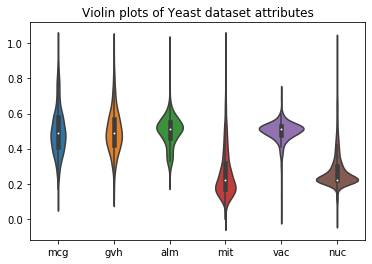

In [5]:
ax = sns.violinplot(data=yeastData.iloc[:,[1,2,3,4,7,8]], orient="v")
plt.rcParams["figure.figsize"] = (15,15)
plt.title("Violin plots of Yeast dataset attributes")
ax = sns.countplot(yeastData["loc"])

In [1]:
ax = sns.stripplot(data=yeastData.iloc[:,[1,2,3,4,7,8]], jitter=0.2, size=2.5, orient="v")
ax = sns.boxplot(data = yeastData.iloc[:,[1,2,3,4,7,8]], orient="v")

NameError: name 'sns' is not defined

NameError: name 'sns' is not defined

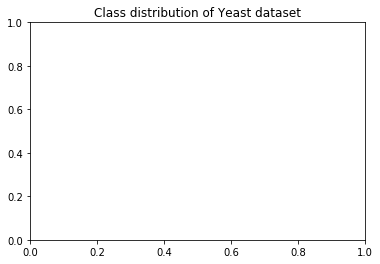

In [3]:
plt.title("Class distribution of Yeast dataset")
ax = sns.countplot(yeastData["loc"])

------------Fold 1
              precision    recall  f1-score   support

         CYT       0.45      0.62      0.52       198
         ERL       0.00      0.00      0.00         5
         EXC       0.50      0.37      0.42        19
         ME1       0.53      0.59      0.56        17
         ME2       0.45      0.30      0.36        33
         ME3       0.73      0.89      0.80        74
         MIT       0.81      0.42      0.55       180
         NUC       0.50      0.52      0.51       197
         POX       0.29      0.43      0.34        14
         VAC       0.00      0.00      0.00         5

    accuracy                           0.54       742
   macro avg       0.43      0.41      0.41       742
weighted avg       0.57      0.54      0.53       742

Confusion Matrix: 
 [[122   0   0   0   1   5   7  62   0   1]
 [  0   0   2   0   2   0   0   0   0   1]
 [  3   0   7   2   3   0   0   2   1   1]
 [  0   0   1  10   0   1   0   0   4   1]
 [  1   0   2   5  10   3   1 

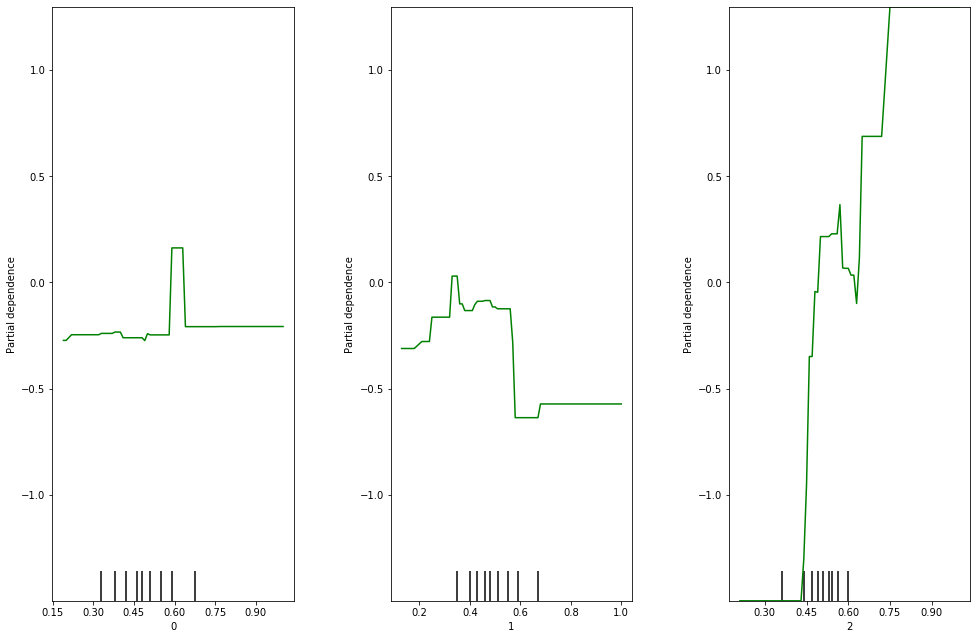

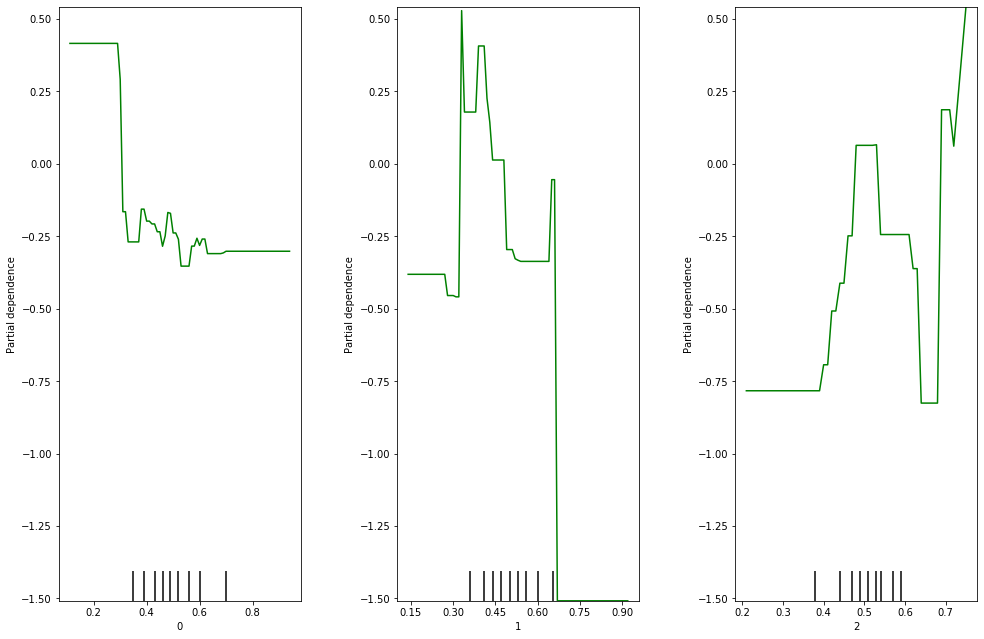

In [9]:
model = GradientBoostingClassifier(n_estimators=100, max_features=None, max_depth=2, random_state=5)
# models = (GradientBoostingClassifier(n_estimators=100, max_features=None, max_depth=2, random_state=5),
#           GradientBoostingClassifier(n_estimators=100, max_features=None, max_depth=2, random_state=0))
# GradientBoostingClassifier(n_estimators=20, learning_rate = 0.1, max_features=NONE=all, max_depth = 2, random_state = 0)
# titles = ("GradientBoost1",
#           "GradientBoost2")
kFold = KFold(n_splits=2, shuffle=False, random_state=39)

yeastAttrib = yeastData.iloc[:,1:9].values  # fix column indexes
yeastTarget = yeastData["loc"].values
fold = 1
for train_index, test_index in kFold.split(yeastAttrib):
    print(f"------------"
          f"Fold {fold}")
    fold += 1
#     for model, title in zip(models, titles):
#     print(f"Model {title}")
    train_data, train_target = yeastAttrib[train_index], yeastTarget[train_index]
    test_data, test_target = yeastAttrib[test_index], yeastTarget[test_index]
    clf = model.fit(train_data, train_target)
    prediction = clf.predict(test_data)
    print(classification_report(test_target, prediction))
    print(f"Confusion Matrix: \n {confusion_matrix(test_target, prediction)}")
    features = [0, 1, 2]
    plot_partial_dependence(clf, train_data, features, target="CYT")
    #This plots how important are features 0 1 and 2 for classifying an observation as CYT